**Заголовок:** Исследование рынка видеоигр

**Описание проекта:**<br>Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:** Проанализировать рынок видеоигр. Выделить характерный срок жизни платформы. Выявить перспективные платформы. Определить характерные отличия для пользователей разных регионов. Проверить гипотезы.

**Ход исследования:**
- Подготовка данных: загрузка и изучение общей информации из представленного датасета.
- Предобработка данных: преобразование данных в нужные типы, работа с пропусками и дубликатами, добавление нужных столбцов.
- Исследовательский анализ данных: построение и изучение распределения наиболее популярных платформ, определение потенциально прибыльных платформ, изучение диаграммы рассеяния и корреляции между отзывами и продажами
- Составление портрета пользователя каждого региона: выявление популярных платформ, жанров. Влияения рейтинга ESRB на продажи в отдельном регионе.
- Проверка гипотез: средние пользовательские рейтинги платформ Xbox One и PC одинаковые или нет. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Общий вывод:** резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

С помощью данного исследования мы стремимся дать всесторонний анализ ранка видеоигр, что станет отправной точкой для дальнейших исследований и автоматизированных систем прогнозирования.


In [2]:
#Импортируме нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
#Читаем файл
data = pd.read_csv(r"../datasets/games.csv")

## Предобработка данных

In [5]:
#Получаем информацию по датафрейму
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
#Приводим колонки к нижнему регистру
data.columns = map(str.lower, data.columns)

In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
#Заменяем тип столбца
data["year_of_release"] = data["year_of_release"].astype("Int64")

In [9]:
#Ищем строки с пропусками в столбце name
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
#Удаляем две строчки спропусками в столбце 'name'
data = data.dropna(subset=['name'])

In [11]:
#Смотрим где есть пропуски и сколько их
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [12]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


In [13]:
#Проверяем на полные дубликаты
data.duplicated().sum()

0

In [14]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Наблюдаем две строчки с неявными дубликатами

In [15]:
print(len(data))
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first')
print(len(data))

16713
16712


In [16]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Оставляем только первое вхождение, так как там более полная информация. Проверяем удалили ли мы неявные дубликаты.

In [17]:
#Заменяем tbd на NaN и преобразовываем столбец в тип float64
data.loc[data['user_score'] == "tbd", 'user_score'] = np.nan
data["user_score"] = data['user_score'].astype('float64')

In [18]:
#Записываем суммарные продажи в новый столбец total_sales по строкам
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38



<br>Вывод: были отредактированны названия столбцов. Изменены типы столбцов: "year_of_release", "user_score". Удалены 2 строчки с пропусками. Явные дубликаты не были обнаружены. Были обнаружены неявные дубликаты и удалены. В столбце 'user_score' tbd (to be determined) был заменен на NaN. Пропущенные значения в столбцах: 'user_score', 'critic_score', 'rating' не были тронуты. <br>
    Почему могли возникнуть пропуски?<br>
    1. Человечесикий фактор, ошибка.<br>
    2. Техническая ошибка.<br>
    3. В столбцах с оценками фильмы просто не были оценены или их оценка неизвестна. Также как неизвестен год выпуска фильма.<br>
    Добавлен новый столбец - 'total_sales' с суммарными продажами.

## Исследовательский анализ данных

In [19]:
df_year_of_release = data.groupby("year_of_release")['total_sales'].count()
df_year_of_release

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: total_sales, dtype: int64

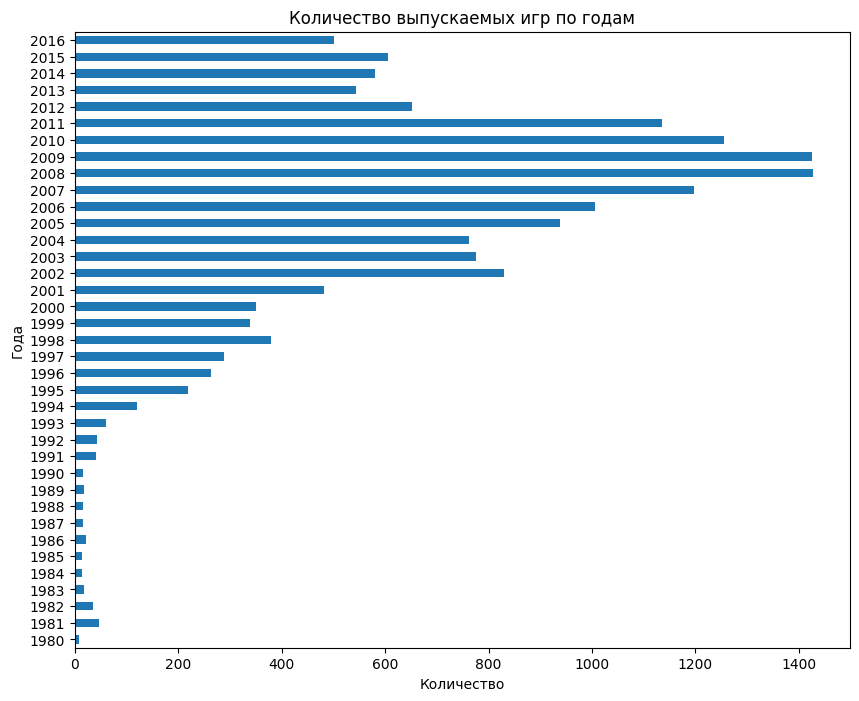

In [20]:
plt.figure(figsize=(10,8))
df_year_of_release.plot(kind='barh');
plt.ylabel('Года')
plt.xlabel('Количество')
plt.title('Количество выпускаемых игр по годам')
plt.show()

Как мы можем наблюдать за 1980 год игр было выпущено совсем мало. Больше 100 игр начали выпускать с 1994 года, но мы будем использовать все данные для анализа

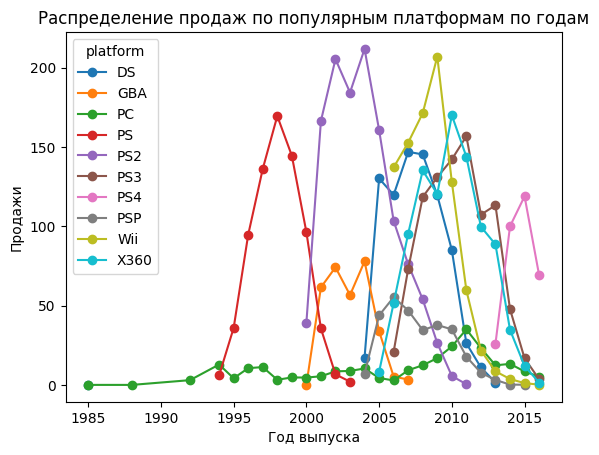

In [21]:
#Создавем датафрейм сгруппированный по платформам
df_platform = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

#Выбираем топ 5 платформ
top_platforms = df_platform.nlargest(10).index

#Фильтруем данные по 10 платформам
data_top_platforms = data[data['platform'].isin(top_platforms)]

#Создаем датафрейм сшоуппированный по годам и платформе
df_year_of_release_platform = data_top_platforms.groupby(["year_of_release", 'platform']).agg(total_sales=('total_sales', 'sum')).unstack()
df_year_of_release_platform.columns = df_year_of_release_platform.columns.droplevel(0)

#Строим график распределения
df_year_of_release_platform.plot(marker="o", linestyle="-");
plt.title('Распределение продаж по популярным платформам по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.show()

In [22]:
#Группируем данные и выводим min и max по платформам
platform_lifespan = data.groupby('platform')['year_of_release'].agg(['min', 'max'])

#Добавляем столбец жизненного цикла и находим его
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']
average_lifespan = platform_lifespan['lifespan'].mean()
print(f'Средний жизненный цикл платформ {average_lifespan:.1f} лет')

Средний жизненный цикл платформ 7.6 лет


In [23]:
#Берем данные после 2012 года
data = data.query('year_of_release >= 2012')
len(data)

2885

In [24]:
#Создаем список платформ, получивших прибыль за 2016 год
platforms_2016 = data.query('year_of_release == 2016 and total_sales > 0')['platform'].unique()
platforms_2016

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

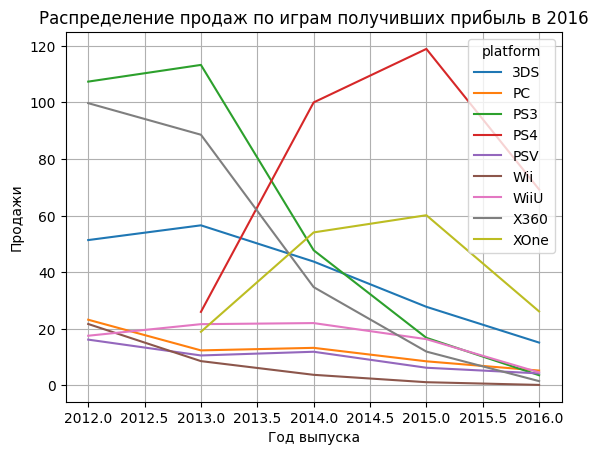

In [25]:
#Создаем датафрейм сшоуппированный по годам и платформе
df_year_of_release_platform = data[data['platform'].isin(platforms_2016)].groupby(["year_of_release", 'platform']).agg(total_sales=('total_sales', 'sum')).unstack()
df_year_of_release_platform.columns = df_year_of_release_platform.columns.droplevel(0)

#Строим график распределения
df_year_of_release_platform.plot();
plt.title('Распределение продаж по играм получивших прибыль в 2016')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.grid()
plt.show()

<br>Анализируя данный график, можно отметить что в 2016 году был общий спад по платформам. Потенциально прибыльные платформы по кол-ву продаж: PS4, XOne. Также не такая прибыльная, но более стабильная платформа PC, даже исходя из того факта, что средний жизненный цикл больше 7.6 лет.

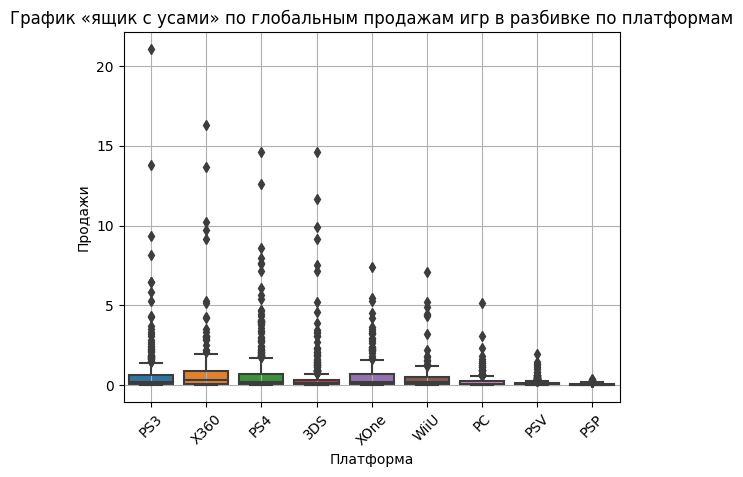

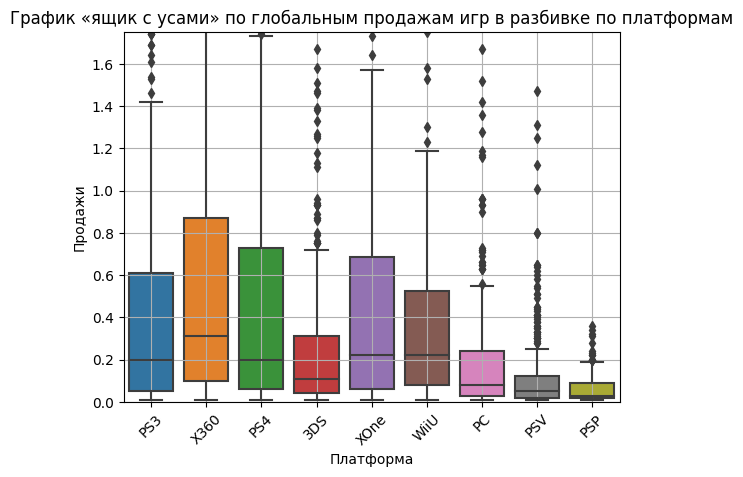

In [26]:
platform_count = data['platform'].value_counts()

top_platforms_boxplot = platform_count[platform_count > 100].index
df_boxplot = data[data['platform'].isin(top_platforms_boxplot)]

sns.boxplot(x='platform', y='total_sales', data=df_boxplot)
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.grid()
plt.show()

sns.boxplot(x='platform', y='total_sales', data=df_boxplot)
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.xticks(rotation=45)
plt.ylim(0, 1.75)
plt.grid()
plt.show()

<br>Большинство игр продается не в таких больших объемах, но есть очень популярные игры, которые образовывают выбросы. Например выделяется из всех Wii, PlayStation, XBOX.<br>
    Платформы с наибольшими медианными продажами: X360, PS3, PS4, XOne SNES, 2600.<br>

In [27]:
#Берем данные только по PS4 для анализа
ps4_data = data[data['platform'] == 'PS4']
ps4_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


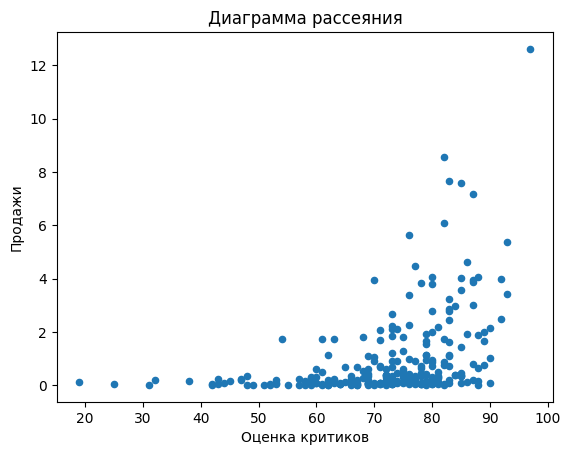

Корреляция продаж с оценками критиков равна 0.41


In [28]:
#Cтроим диаграмму рассеивания
ps4_data.plot(x='critic_score', y='total_sales', kind='scatter');
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния')
plt.show()

#Находим корреляцию
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print(f'Корреляция продаж с оценками критиков равна {critic_corr:.2f}')

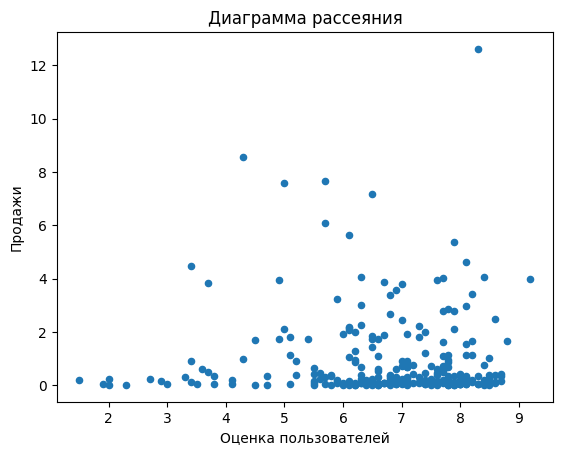

Корреляция продаж с оценками пользователей равна -0.03


In [29]:
#Cтроим диаграмму рассеивания
ps4_data.plot(x='user_score', y='total_sales', kind='scatter');
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи')
plt.title('Диаграмма рассеяния')
plt.show()

#Находим корреляцию
critic_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f'Корреляция продаж с оценками пользователей равна {critic_corr:.2f}')

Корреляция между продажами PS4 и оценками критиков выше, чем между продажами и оценками пользователей, и равна примерно 0,35, что говорит о связи средней тесносты. В свою очередь корреляция между оценками пользователей и продажами отрицательная и равна примерно 0,05, что говорит об очень слабой зависимости.<br>
    Из чего можно сделать вывод, что оценки критиков больше влияет на продажи и в целом зависимость более высокая. Но нельзя отдавать все лавры критикам, так есть и другие факторы, влияющие на продажи.<br>

In [30]:
#Берем остальные топ платформы
other_top_platforms = data[data['platform'] != 'PS4']['platform'].value_counts()
other_top_platforms

PS3     492
PSV     411
3DS     396
X360    292
PC      250
XOne    247
PSP     173
WiiU    147
Wii      54
DS       31
Name: platform, dtype: int64

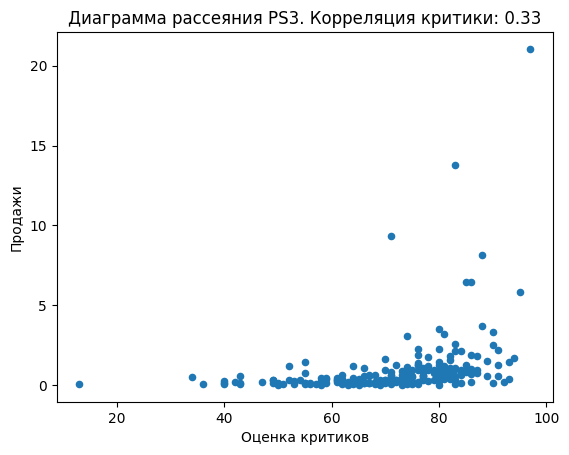

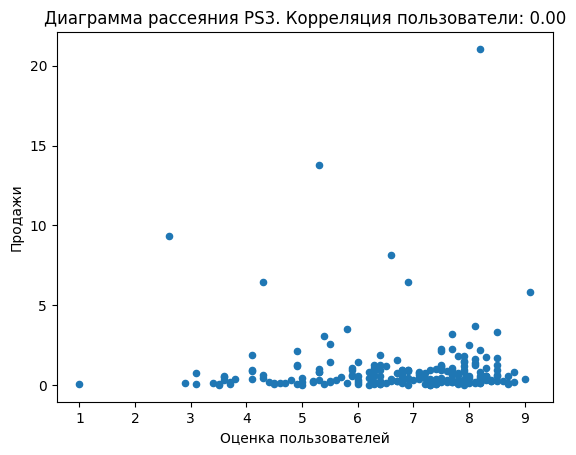

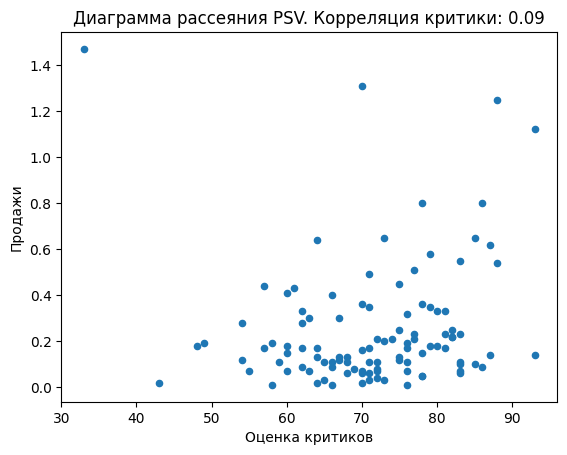

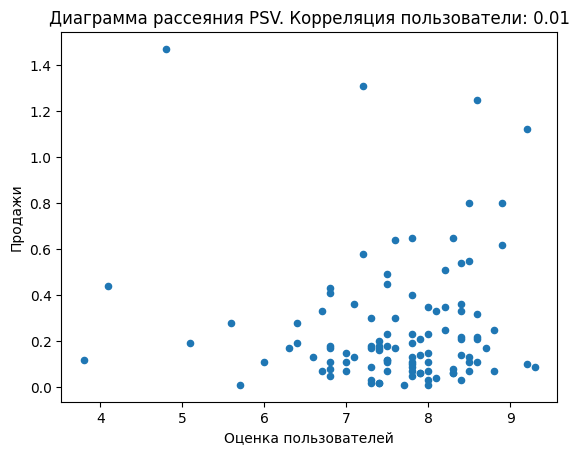

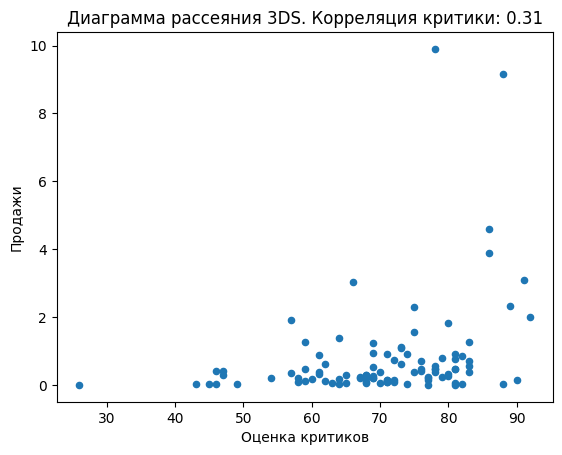

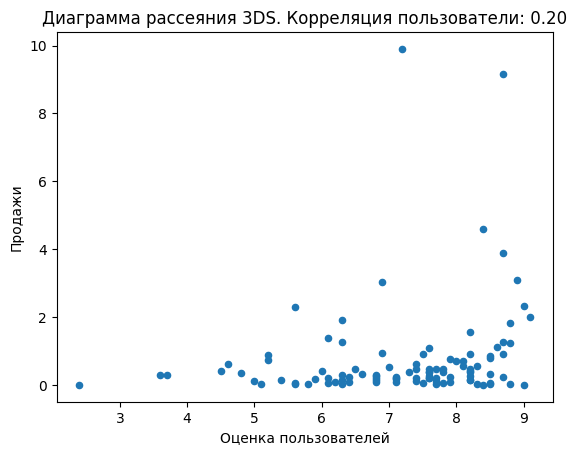

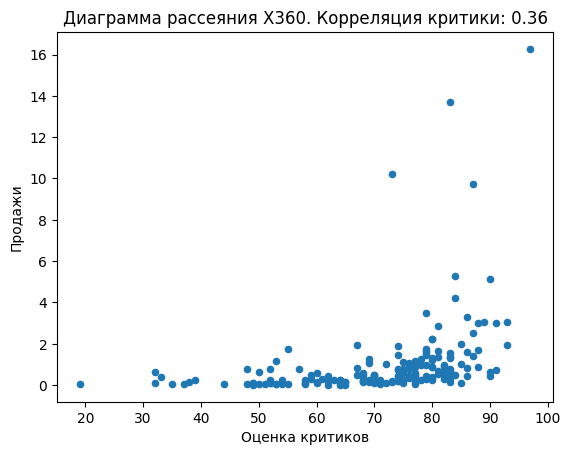

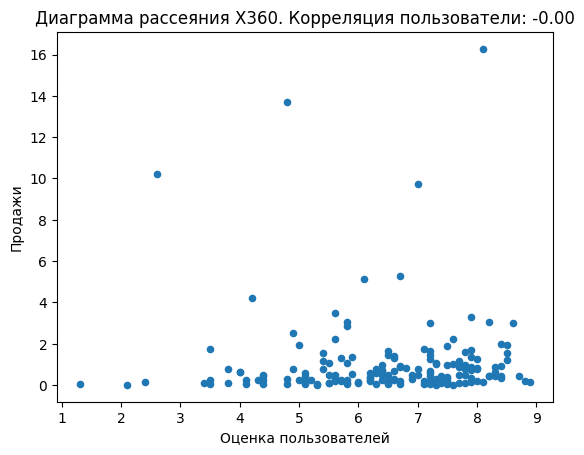

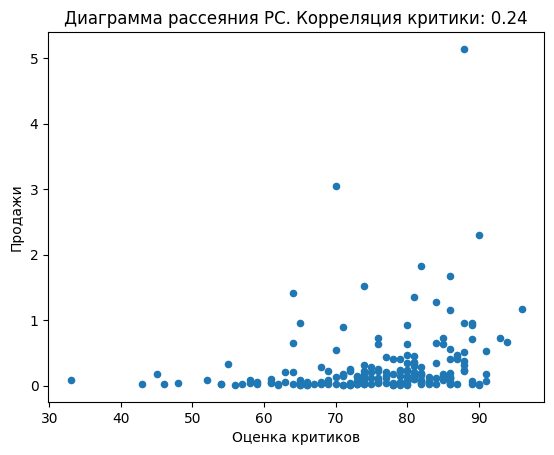

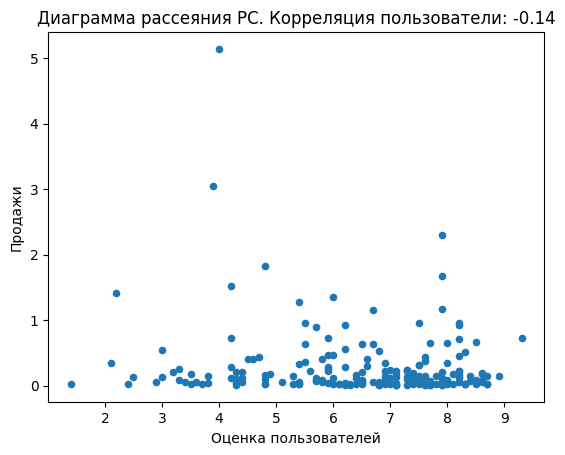

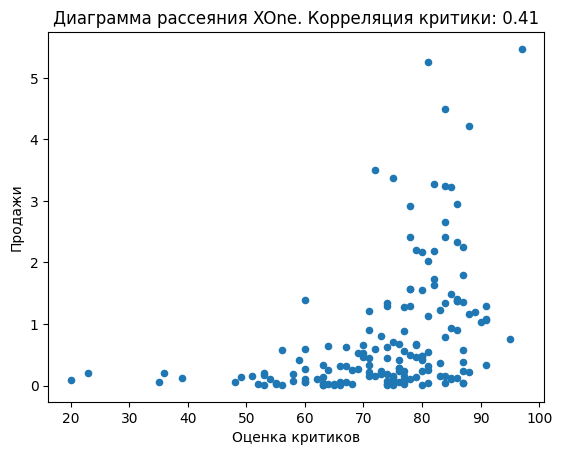

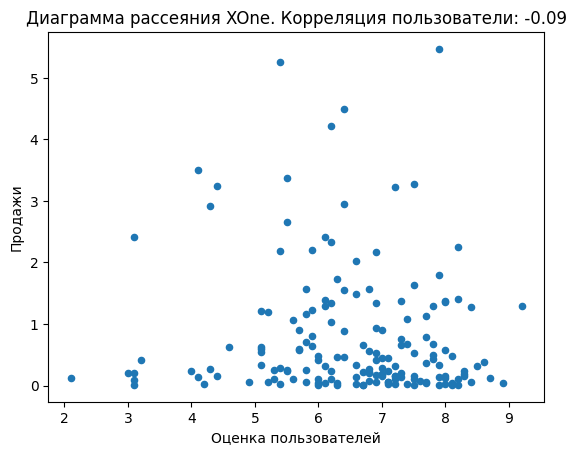

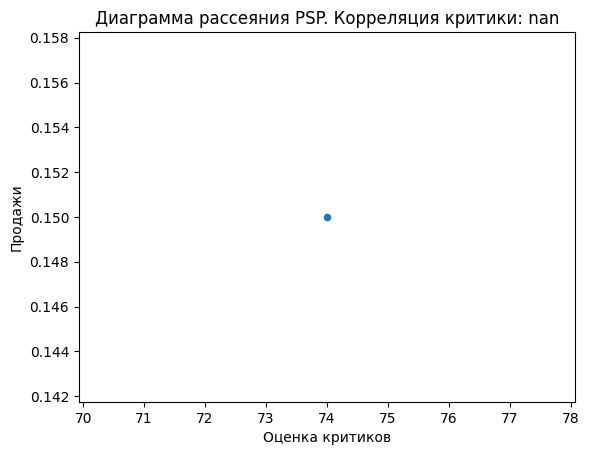

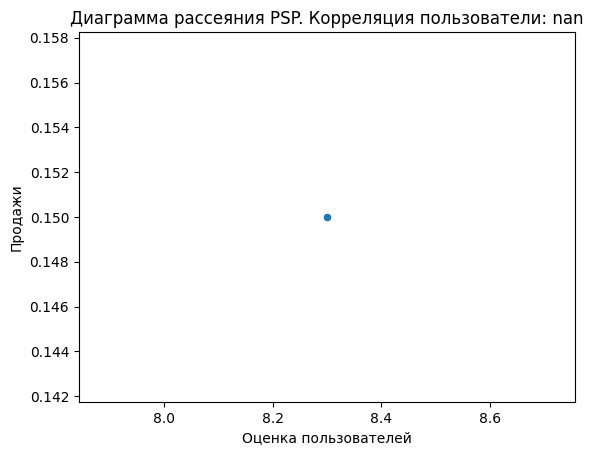

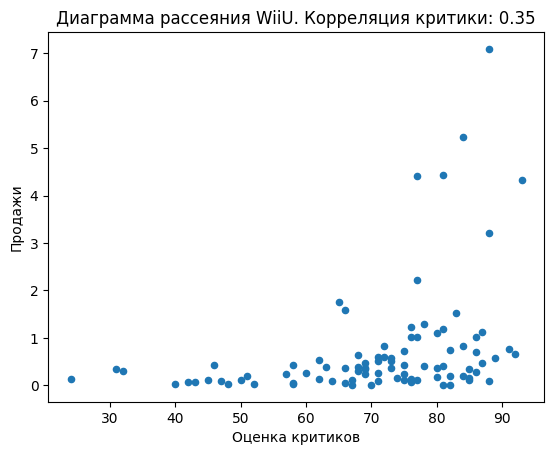

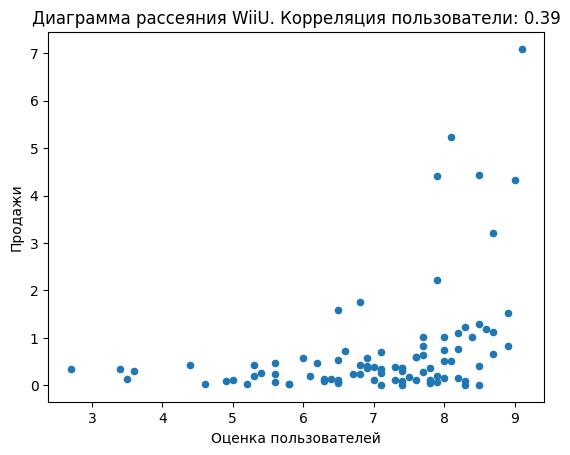

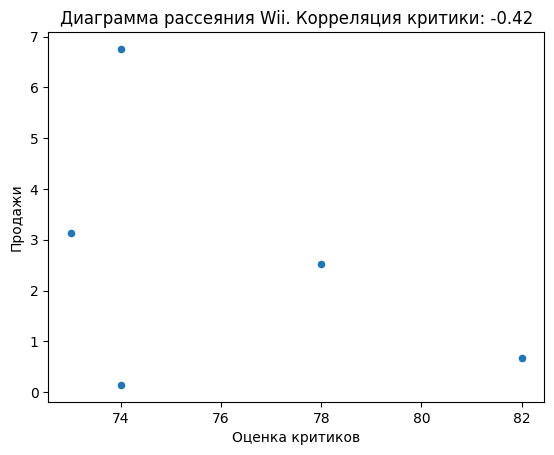

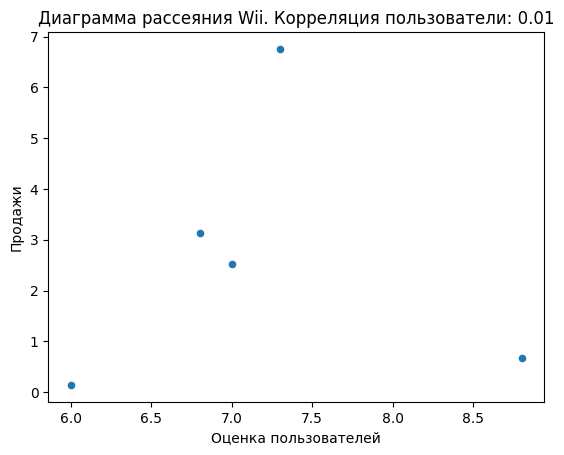

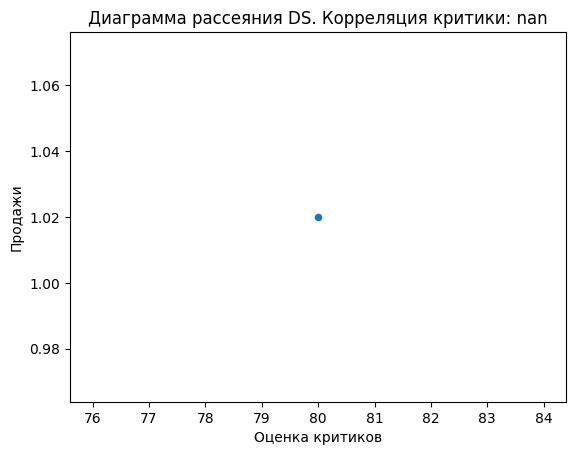

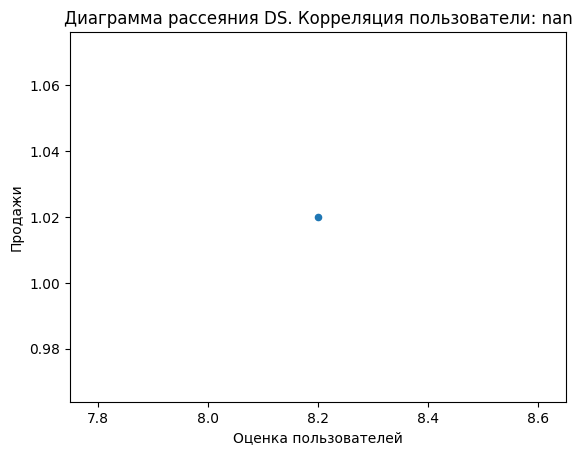

In [31]:
#Проходимся по всем этим платформам
for i in other_top_platforms.index:
    temp_data = data[(data['platform'] == i)]
    temp_data = temp_data.dropna(subset=['critic_score', 'user_score'])

    #Считаем коэффициенты корреляции
    corr_critic = temp_data['critic_score'].corr(temp_data['total_sales'])
    corr_user = temp_data['user_score'].corr(temp_data['total_sales'])

    #Строим диаграмму рассеивания
    temp_data.plot(x='critic_score', y='total_sales', kind='scatter');
    plt.xlabel('Оценка критиков')
    plt.ylabel('Продажи')
    plt.title(f'Диаграмма рассеяния {i}. Корреляция критики: {corr_critic:.2f}')
    plt.show()
    
    #Строим диаграмму рассеивания
    temp_data.plot(x='user_score', y='total_sales', kind='scatter');
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Продажи')
    plt.title(f'Диаграмма рассеяния {i}. Корреляция пользователи: {corr_user:.2f}')

    

По остальным платформам в большинстве случаев прослеживается похожая тенденция в плане корреляции оценки критиков и продаж - сердняя степень тесносты. Что говорить о корреляции пользовательских оценок и продаж, то в каких то случаях она положительная (PSV, 3DS и тд), где то орицательная (PS3, X360, PC и тд), но близка к нулю, что говорит о слабой связи. Единственное исключение - WiiU, там корреляция равна 0,35.

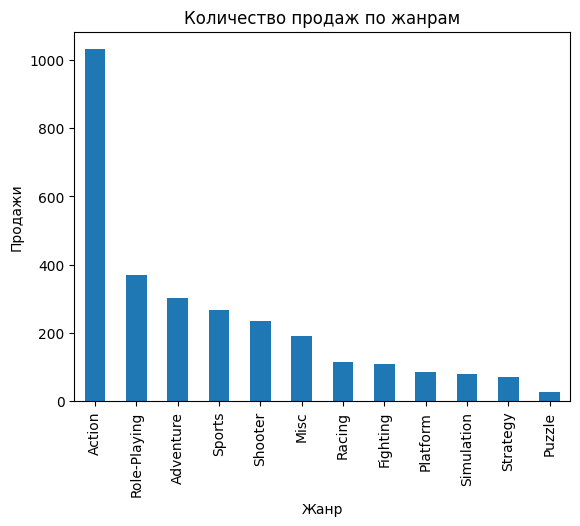

In [32]:
data['genre'].value_counts().plot(kind='bar')
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('Количество продаж по жанрам')
plt.show()

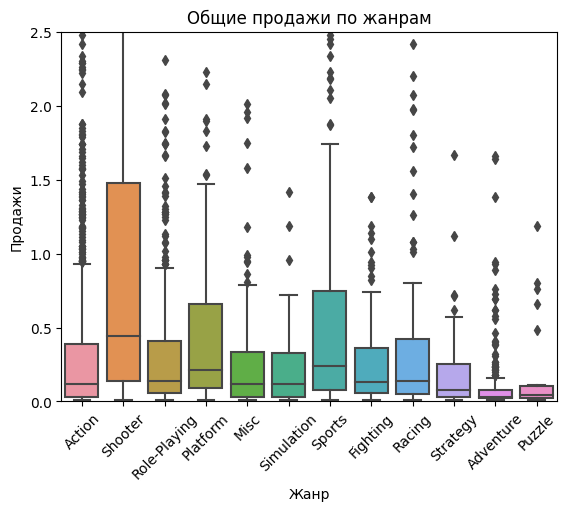

,total_sales
genre,
Shooter,0.44
Sports,0.24
Platform,0.21
Role-Playing,0.14
Racing,0.14


In [33]:
df_piv = data.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False)


sns.boxplot(x='genre', y='total_sales', data=data)
plt.xlabel('Жанр')
plt.ylabel('Продажи')
plt.title('Общие продажи по жанрам')
plt.xticks(rotation=45)
plt.ylim(0, 2.5)
plt.show()
df_piv.head()

Больше всего кол-во продаж у жанра Action. Самые высокие медианные продажи у Shooter. Пазлы находятся на последнем месте по колву игр. Наименьшее медианное значение у жанра Adventure. Лучший жанр для выбора - Shooter.

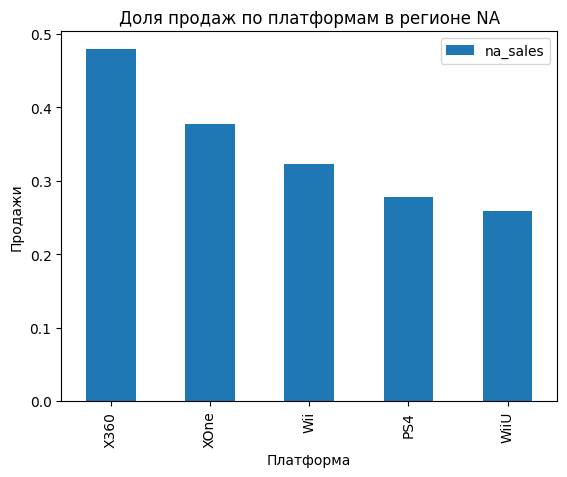

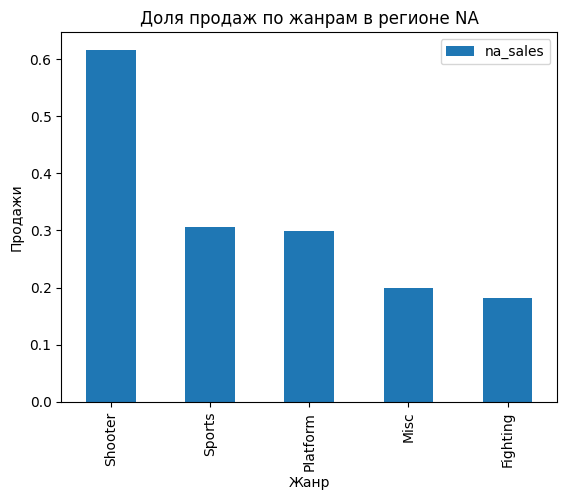

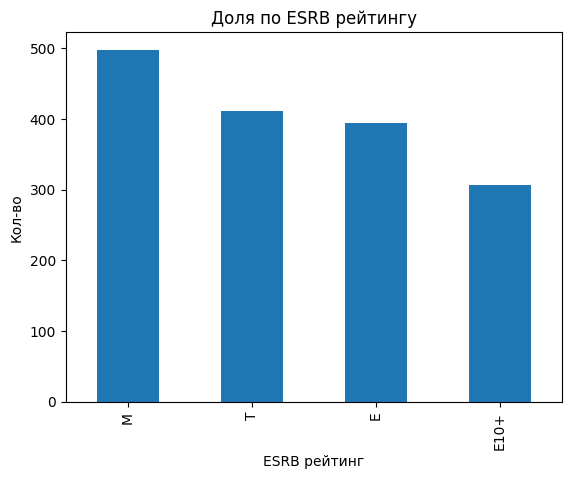

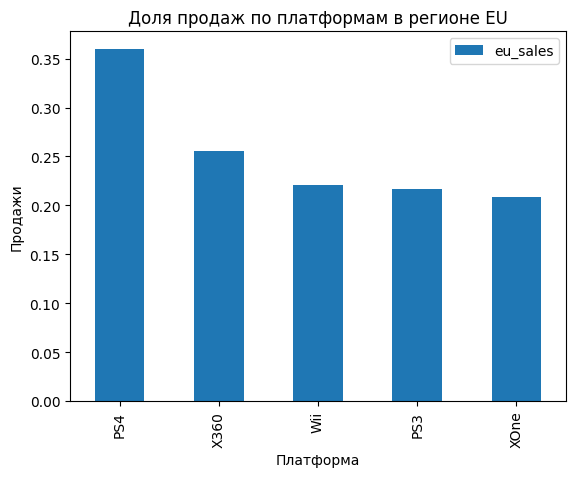

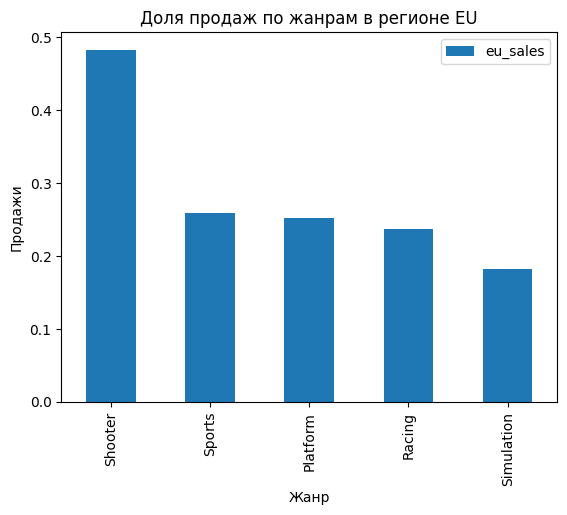

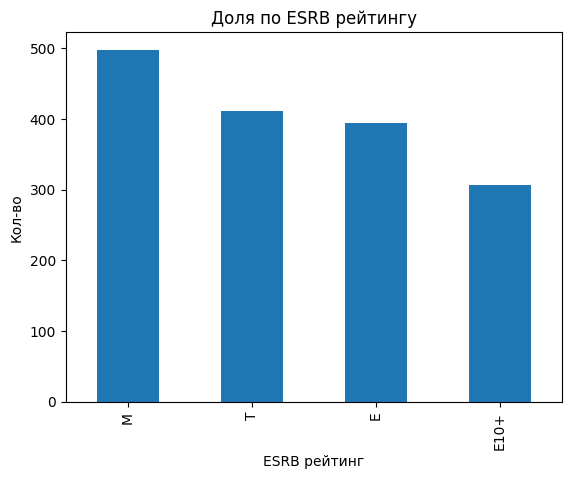

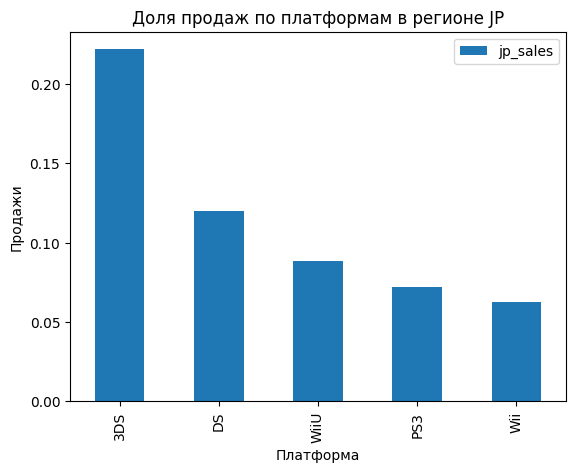

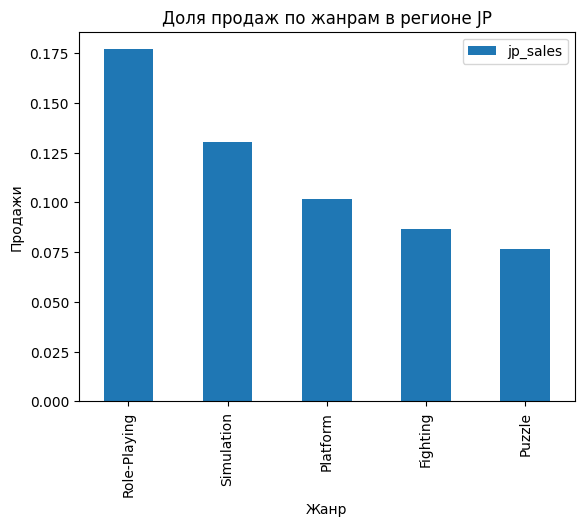

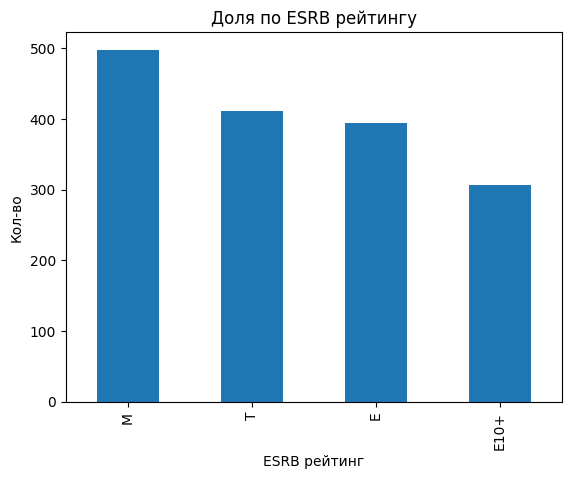

In [34]:
lst_region = ['na_sales', 'eu_sales', 'jp_sales']
for i in lst_region:
    data.pivot_table(index='platform', values=i).sort_values(by=i,ascending=False).head(5).plot(kind='bar')
    plt.title(f'Доля продаж по платформам в регионе {i[:-6].upper()}')
    plt.xlabel('Платформа')
    plt.ylabel('Продажи')
    plt.show()

    data.pivot_table(index='genre', values=i).sort_values(by=i,ascending=False).head(5).plot(kind='bar')
    plt.title(f'Доля продаж по жанрам в регионе {i[:-6].upper()}')
    plt.xlabel('Жанр')
    plt.ylabel('Продажи')
    plt.show()

    esrb_rating = data.groupby('rating')[i].count().sort_values(ascending=False).plot(kind='bar');
    plt.xlabel('ESRB рейтинг')
    plt.ylabel('Кол-во')
    plt.title('Доля по ESRB рейтингу')
    plt.show()

XBOX лидирует в регионе NA. PS лидирует в регионе EU, 3DS в JP. Shooter самый популярный жанр в регионах NA и EU. Role-playing самый популярный жанр в JP. Рейтинг M(Mature) самый распространенный во всех регионах.

## Проверка гипотез

### Гипотеза 1

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны<br>
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC НЕ равны.

In [35]:
alpha = 0.05

#Фильтруем данные
xbox_ratings = data[(data['platform'] == 'XOne') & (data['user_score'].notna())]['user_score']
pc_ratings = data[(data['platform'] == 'PC') & (data['user_score'].notna())]['user_score']

#Смотрим равны ли дисперсии
print(xbox_ratings.var(), pc_ratings.var())

print(f'Средние выборок: {xbox_ratings.mean()} и {pc_ratings.mean()}')
#t-test Стьюдента
results = st.ttest_ind(xbox_ratings, pc_ratings, equal_var=False)

print(f'P-value равно {results.pvalue}')
if results.pvalue < alpha:
    print('Отвергаем Нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

1.9069968429360695 2.770443997158418
Средние выборок: 6.521428571428572 и 6.4286407766990274
P-value равно 0.5489537965134912
Не отвергаем нулевую гипотезу


Не отвергаем нулевую гипотезу. Поэтому можно говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

### Гипотеза 2

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны<br>
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports НЕ равны.

In [36]:
alpha = 0.05

#Фильтруем данные
action_ratings = data[(data['genre'] == 'Action') & (data['user_score'].notna())]['user_score']
sports_ratings = data[(data['genre'] == 'Sports') & (data['user_score'].notna())]['user_score']

#Выводим дисперсии
print(action_ratings.var(), pc_ratings.var())

#Выводим средние выборок
print(f'Средние выборок: {action_ratings.mean()} и {sports_ratings.mean()}')

results = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)
print(f'P-value равно {results.pvalue}')

if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

1.8890840494348111 2.770443997158418
Средние выборок: 6.825047801147227 и 5.455670103092784
P-value равно 5.98945806646755e-20
Отвергаем нулевую гипотезу


Так как мы отвергаем нулевую гипотезу, можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза должна исходить из равенства. Альтернативная уже из того, что либо НЕ равно, больше, меньше.<br>
    В двух вариантах применил t-test Стьюдента, так как сравниваем средние двух независимых выборок


# Общий вывод

<b>Предобработка данных:</b><br>
    1. Изменены названия столбцов.<br>
    2. Измененен тип столбцов, обработаны пропуски, где это возможно.<br>
    3. Добавлен столбец 'total_sales' с продажами по всем регионам.<br>
    4. Обработаны неявные дубликаты.<br>
    <b>Исследовательский анализ данных:</b><br>
    1. Построено распраделение по продажам по более популярным платформам. Также определено, что средний жизненный цикл платформ 7.6 лет.<br>
    2. Можно отметить что в 2016 году был общий спад по платформам. Потенциально прибыльные платформы по кол-ву продаж: PS4, XOne. Также не такая прибыльная, но более стабильная платформа PC.<br>
    3. Большинство игр продается не в таких больших объемах, но есть очень популярные игры, которые образовывают выбросы. Например выделяется из всех Wii, PlayStation, XBOX.<br>
    Платформы с наибольшими медианными продажами: X360, PS3, PS4, XOne SNES, 2600.<br>
    4. Корреляция между продажами PS4 и оценками критиков выше, чем между продажами и оценками пользователей, и равна примерно 0,35, что говорит о связи средней тесносты. В свою очередь корреляция между оценками пользователей и продажами отрицательная и равна примерно 0,05, что говорит об очень слабой зависимости.<br>
    Оценки критиков больше влияет на продажи и в целом зависимость более высокая. Но нельзя отдавать все лавры критикам, так есть и другие факторы, влияющие на продажи.<br>
    5. По остальным платформам в большинстве случаев прослеживается похожая тенденция в плане корреляции оценки критиков и продаж - сердняя степень тесносты. Что говорить о корреляции пользовательских оценок и продаж, то в каких то случаях она положительная (PSV, 3DS и тд), где то орицательная (PS3, X360, PC и тд), но близка к нулю, что говорит о слабой связи. Единственное исключение - WiiU, там корреляция равна 0,35.<br>
    6. Больше всего кол-во продаж у жанра Action. Самые высокие медианные продажи у Shooter. Пазлы находятся на последнем месте по колву игр. Наименьшее медианное значение у жанра Adventure. Лучший жанр для выбора - Shooter.<br>
    7. XBOX лидирует в регионе NA. PS лидирует в регионе EU, 3DS в JP. Shooter самый популярный жанр в регионах NA и EU. Role-playing самый популярный жанр в JP. Рейтинг M(Mature) самый распространенный во всех регионах.<br>
    <b>Проверка гипотез:</b><br>
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.<br>
    2. Cредние пользовательские рейтинги жанров Action и Sports разные.<br>